In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
from wordcloud import WordCloud

df = pd.read_csv('/content/drive/MyDrive/DUCSResearch/Bias in LLMs/colab_notebooks/bias_llm/data/llama2-7b-200-climate-defense/Indian defense/data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DUCSResearch/Bias in LLMs/colab_notebooks/bias_llm/data/llama2-7b-200-climate-defense/Indian climate/data.csv')

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stopwords_english = stopwords.words('english')
stopwords_english.extend(['from', 'subject', 're', 'edu', 'use', 'said', 'also', 'minister'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dfs = [df, df2]
TOPICS = ['Indian defense', 'Indian climate']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for _df, _t in zip(dfs, TOPICS):
  _df['Processed Text'] = _df['Generated Text'].map(lambda x: re.sub('[,\.!?]', '', x))
  _df['Processed Text'] = _df['Processed Text'].map(lambda x: x.lower())
  _df['Processed Text'] = _df['Processed Text'].map(lambda s: ' '.join([i for i in nltk.word_tokenize(s)[2:] if i not in stopwords_english and i.isalpha() and len(i) >= 3]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-31-acb8bf54c3f9>:2: DeprecationWarning: invalid escape sequence '\.'
  _df['Processed Text'] = _df['Generated Text'].map(lambda x: re.sub('[,\.!?]', '', x))


In [ ]:
df_merged = dfs[0].append(dfs[1])
df_shuffled = df_merged.sample(frac = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-2fa195885341>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = dfs[0].append(dfs[1])


In [ ]:
df_merged[['Processed Text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Processed Text
0,looking war pakistan india defence manohar par...
1,china aggressive actions ladakh unacceptable i...
2,army chief meet border tension indian defense ...
3,stroke critical condition senior indian offici...
4,visit russia discuss cooperation indian defens...
...,...
495,change policy review indian climate policy sto...
496,extreme nature summers extremely hot important...
497,generally hot humid best time visit india wint...
498,change expert says forced leave job climate sc...


In [ ]:
df_shuffled[['Processed Text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Processed Text
20,change adaptation resilience strategies often ...
124,nirmala sitharaman wednesday india first count...
44,ministry denies reports blocked deal india den...
453,tropical winter temperature ranges summer goes...
10,ministry approves billion apache attack helico...
...,...
51,antony announced india decided purchase russia...
265,manohar parrikar india allow pakistan soil ter...
491,diverse varies region region climate india inf...
267,geography india subcontinent wide variety clim...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


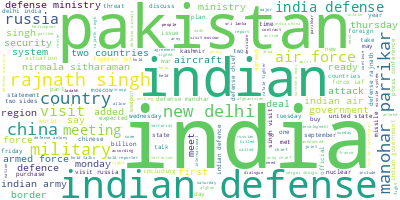

In [ ]:
string = ','.join(list(dfs[0]['Processed Text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(string)
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


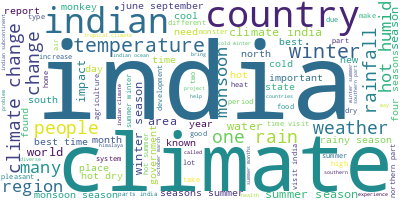

In [ ]:
string = ','.join(list(dfs[1]['Processed Text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(string)
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


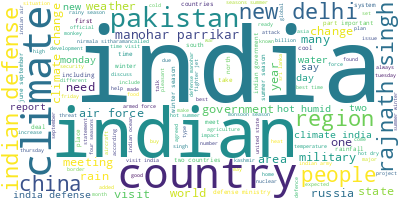

In [ ]:
string = ','.join(list(df_merged['Processed Text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(string)
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


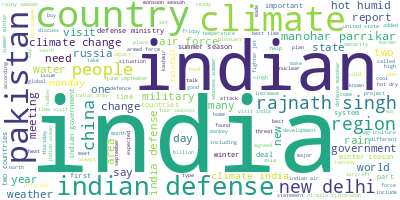

In [ ]:
string = ','.join(list(df_shuffled['Processed Text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(string)
wordcloud.to_image()

In [ ]:
%%capture
%pip install pyLDAvis pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import os
import pickle
import gensim
import pyLDAvis
import pyLDAvis.gensim
import gensim.corpora as corpora

from pprint import pprint
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stopwords_english] for doc in texts]

data = df_merged['Processed Text'].values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.023*"india" + 0.019*"indian" + 0.014*"climate" + 0.011*"defense" + '
  '0.009*"season" + 0.007*"summer" + 0.007*"country" + 0.007*"visit" + '
  '0.006*"singh" + 0.006*"winter"'),
 (1,
  '0.036*"india" + 0.016*"indian" + 0.012*"climate" + 0.009*"defense" + '
  '0.008*"country" + 0.008*"season" + 0.007*"summer" + 0.006*"visit" + '
  '0.006*"singh" + 0.006*"winter"')]


In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.005669  0.0       1        1  56.204612
0     -0.005669  0.0       2        1  43.795388, topic_info=           Term        Freq       Total Category  logprob  loglift
19       indian  963.000000  963.000000  Default  30.0000  30.0000
79     ministry  238.000000  238.000000  Default  29.0000  29.0000
4029    climate  704.000000  704.000000  Default  28.0000  28.0000
68      defense  552.000000  552.000000  Default  27.0000  27.0000
3986     season  449.000000  449.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
51          two   91.504467  232.992279   Topic2  -5.5881  -0.1090
3992    weather   80.765941  192.711893   Topic2  -5.7129  -0.0440
101       delhi   74.122140  170.914852   Topic2  -5.7988  -0.0098
3979    monsoon   76.872300  194.508478   Topic2  -5.7623  -0.1027
499   countries   71.512889  166.615178   Topic2  -5.8346  -0.0202

[197 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4945      1  0.295674    activist
4945      2  0.689907    activist
4946      1  0.393281   activists
4946      2  0.655468   activists
4279      1  0.448337  adaptation
...     ...       ...         ...
941       2  0.428830      winter
458       1  0.645418       world
458       2  0.351394       world
55        1  0.659453       would
55        2  0.339718       would

[283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [ ]:
import os
import pickle
import gensim
import pyLDAvis
import pyLDAvis.gensim
import gensim.corpora as corpora

from pprint import pprint
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stopwords_english] for doc in texts]

data = df_shuffled['Processed Text'].values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.022*"india" + 0.016*"season" + 0.013*"visit" + 0.010*"defense" + '
  '0.010*"summer" + 0.009*"indian" + 0.009*"climate" + 0.009*"winter" + '
  '0.007*"singh" + 0.006*"country"'),
 (1,
  '0.037*"india" + 0.019*"indian" + 0.015*"climate" + 0.010*"season" + '
  '0.009*"summer" + 0.009*"defense" + 0.008*"winter" + 0.007*"country" + '
  '0.007*"new" + 0.007*"hot"'),
 (2,
  '0.026*"india" + 0.020*"indian" + 0.011*"climate" + 0.011*"defense" + '
  '0.008*"country" + 0.007*"singh" + 0.007*"change" + 0.006*"visit" + '
  '0.006*"new" + 0.006*"china"'),
 (3,
  '0.029*"india" + 0.018*"indian" + 0.014*"climate" + 0.010*"defense" + '
  '0.009*"pakistan" + 0.007*"country" + 0.006*"singh" + 0.005*"two" + '
  '0.005*"visit" + 0.005*"change"')]


In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.003696  0.019174       1        1  31.818533
2     -0.022664 -0.018856       2        1  30.344345
3     -0.019244  0.008460       3        1  19.240712
0      0.038212 -0.008778       4        1  18.596410, topic_info=          Term        Freq       Total Category  logprob  loglift
332     season  441.000000  441.000000  Default  30.0000  30.0000
133      visit  369.000000  369.000000  Default  29.0000  29.0000
136     winter  308.000000  308.000000  Default  28.0000  28.0000
128     summer  370.000000  370.000000  Default  27.0000  27.0000
170   pakistan  278.000000  278.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
731      parts   32.352274  121.886921   Topic4  -5.7712   0.3558
101     indian   93.657871  966.229579   Topic4  -4.7083  -0.6516
183        two   44.973260  236.129204   Topic4  -5.4419   0.0239
6    countries   35.507886  169.989588   Topic4  -5.6782   0.1162
27    ministry   34.022315  240.315895   Topic4  -5.7209  -0.2727

[380 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6347      3  0.573999  absort
1262      1  0.602445  active
1262      2  0.225917  active
1262      3  0.075306  active
1262      4  0.075306  active
...     ...       ...     ...
136       4  0.285362  winter
56        1  0.326667   world
56        2  0.362964   world
56        3  0.196000   world
56        4  0.116148   world

[765 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [ ]:
# LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# with open(LDAvis_data_filepath, 'wb') as f:
#     pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
# LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.045137 -0.003515       1        1  58.553016
0     -0.011032 -0.011397       2        1  17.610774
1     -0.022071 -0.021157       3        1  13.359200
3     -0.012034  0.036069       4        1  10.477010, topic_info=          Term        Freq       Total Category  logprob  loglift
10    minister  101.000000  101.000000  Default  30.0000  30.0000
78      indian   40.000000   40.000000  Default  29.0000  29.0000
31       india   63.000000   63.000000  Default  28.0000  28.0000
110      visit   37.000000   37.000000  Default  27.0000  27.0000
26     defense   43.000000   43.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
13    parrikar    1.416536   21.347913   Topic4  -5.4773  -0.4568
3      country    1.291109   15.106994   Topic4  -5.5700  -0.2037
0     aircraft    1.170333   16.719064   Topic4  -5.6682  -0.4033
109      talks    1.145352   10.192866   Topic4  -5.6898   0.0700
154  countries    1.136325   13.561793   Topic4  -5.6977  -0.2235

[290 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
172       2  0.775358  accepted
837       1  0.395220  advanced
837       2  0.395220  advanced
738       1  0.291038    afghan
738       2  0.291038    afghan
...     ...       ...       ...
132       2  0.129607     would
383       1  0.236321     years
383       2  0.472641     years
383       3  0.236321     years
383       4  0.236321     years

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

In [ ]:
import os
import pickle
import gensim
import pyLDAvis
import pyLDAvis.gensim
import gensim.corpora as corpora

from pprint import pprint
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stopwords_english] for doc in texts]

data = dfs[0]['Processed Text'].values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.028*"indian" + 0.025*"india" + 0.016*"defense" + 0.013*"singh" + '
  '0.010*"new" + 0.010*"visit" + 0.009*"ministry" + 0.009*"pakistan" + '
  '0.008*"china" + 0.007*"army"'),
 (1,
  '0.029*"defense" + 0.027*"india" + 0.015*"indian" + 0.010*"ministry" + '
  '0.009*"singh" + 0.008*"two" + 0.007*"defence" + 0.007*"visit" + '
  '0.006*"country" + 0.006*"new"'),
 (2,
  '0.028*"indian" + 0.024*"india" + 0.017*"defense" + 0.016*"pakistan" + '
  '0.012*"singh" + 0.009*"ministry" + 0.009*"visit" + 0.008*"defence" + '
  '0.008*"new" + 0.007*"delhi"'),
 (3,
  '0.033*"india" + 0.023*"defense" + 0.022*"indian" + 0.014*"singh" + '
  '0.014*"visit" + 0.012*"pakistan" + 0.008*"china" + 0.008*"military" + '
  '0.007*"rajnath" + 0.007*"air"')]


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.005400 -0.014082       1        1  35.863137
0     -0.014901 -0.009359       2        1  24.626584
2     -0.008373  0.023960       3        1  21.028912
1      0.028674 -0.000519       4        1  18.481367, topic_info=          Term        Freq       Total Category  logprob  loglift
68     defense  549.000000  549.000000  Default  30.0000  30.0000
19      indian  599.000000  599.000000  Default  29.0000  29.0000
32    pakistan  267.000000  267.000000  Default  28.0000  28.0000
79    ministry  221.000000  221.000000  Default  27.0000  27.0000
7      defence  165.000000  165.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
59        army   20.161972  144.859661   Topic4  -5.4685  -0.2836
63       china   20.865738  174.206669   Topic4  -5.4342  -0.4337
47   statement   16.768194   86.626754   Topic4  -5.6528   0.0463
263       deal   17.555588  108.634899   Topic4  -5.6069  -0.1342
32    pakistan   19.037184  267.810054   Topic4  -5.5259  -0.9555

[350 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2094      1  0.195259  acquired
2094      2  0.585777  acquired
291       1  0.196328    action
291       2  0.539901    action
291       3  0.196328    action
...     ...       ...       ...
55        1  0.596037     would
55        2  0.145698     would
55        3  0.145698     would
55        4  0.105962     would
2892      2  0.591732    writer

[619 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])